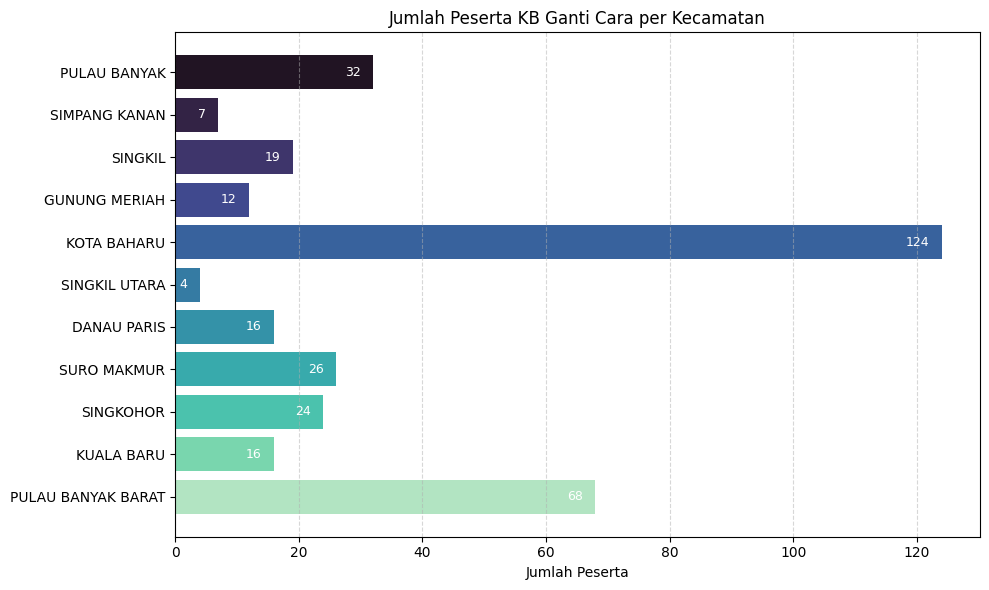

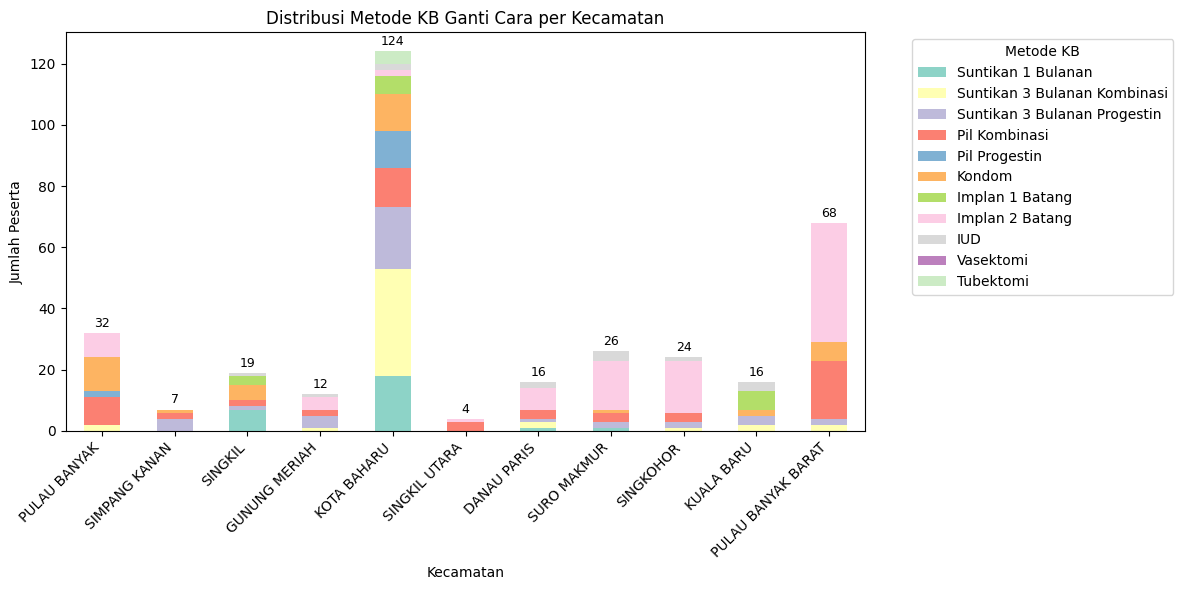

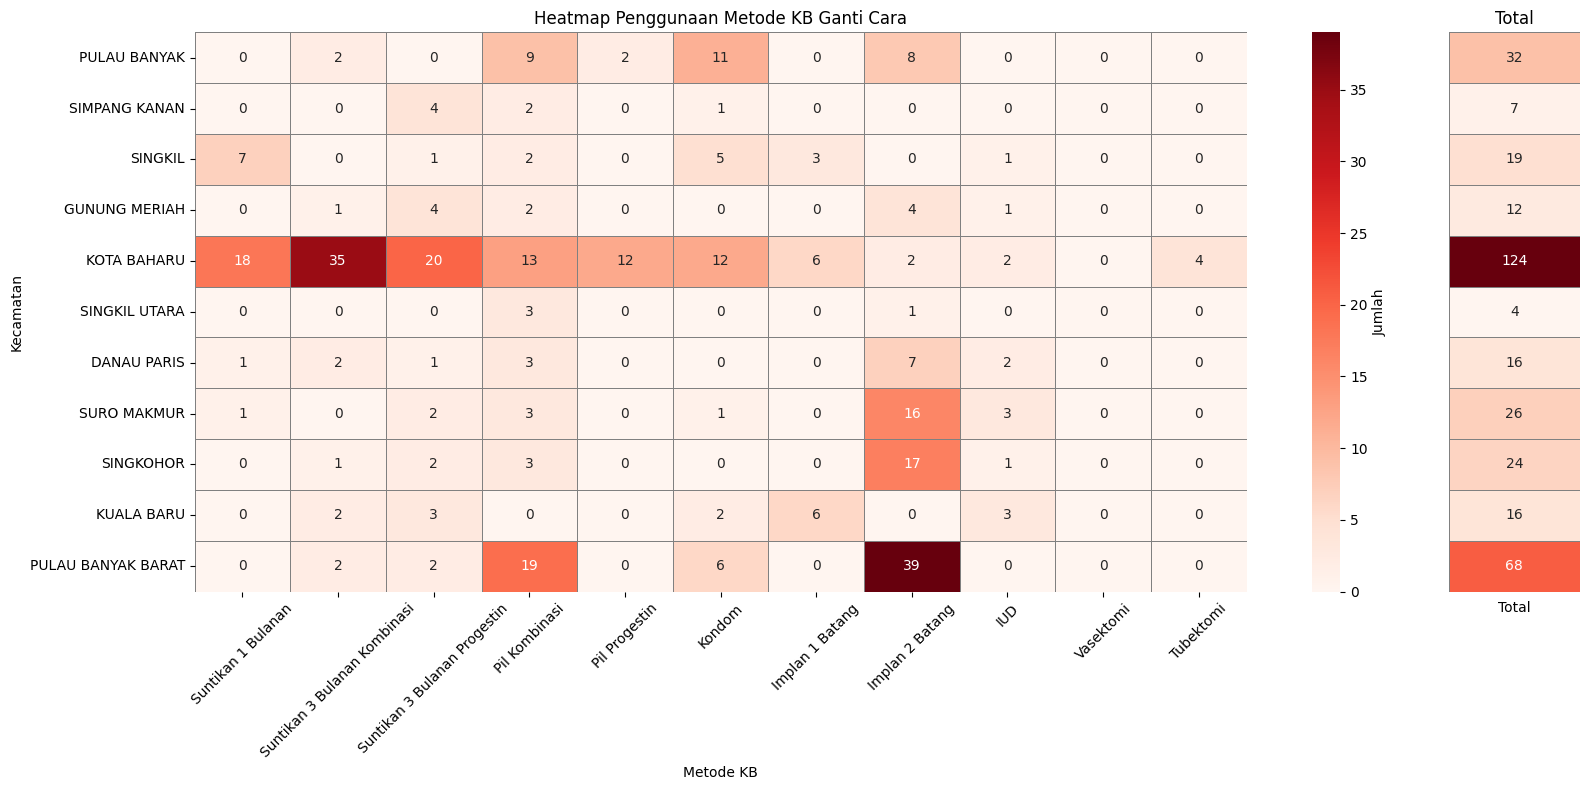

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Buat folder output
output_folder = "output_kb_ganti_cara"
os.makedirs(output_folder, exist_ok=True)

# --- 1. Buat DataFrame ---
data = {
    "Kecamatan": [
        "PULAU BANYAK", "SIMPANG KANAN", "SINGKIL", "GUNUNG MERIAH", "KOTA BAHARU",
        "SINGKIL UTARA", "DANAU PARIS", "SURO MAKMUR", "SINGKOHOR", "KUALA BARU", "PULAU BANYAK BARAT"
    ],
    "Jumlah Peserta KB Ganti Cara": [32, 7, 19, 12, 124, 4, 16, 26, 24, 16, 68],
    "Suntikan 1 Bulanan": [0, 0, 7, 0, 18, 0, 1, 1, 0, 0, 0],
    "Suntikan 3 Bulanan Kombinasi": [2, 0, 0, 1, 35, 0, 2, 0, 1, 2, 2],
    "Suntikan 3 Bulanan Progestin": [0, 4, 1, 4, 20, 0, 1, 2, 2, 3, 2],
    "Pil Kombinasi": [9, 2, 2, 2, 13, 3, 3, 3, 3, 0, 19],
    "Pil Progestin": [2, 0, 0, 0, 12, 0, 0, 0, 0, 0, 0],
    "Kondom": [11, 1, 5, 0, 12, 0, 0, 1, 0, 2, 6],
    "Implan 1 Batang": [0, 0, 3, 0, 6, 0, 0, 0, 0, 6, 0],
    "Implan 2 Batang": [8, 0, 0, 4, 2, 1, 7, 16, 17, 0, 39],
    "IUD": [0, 0, 1, 1, 2, 0, 2, 3, 1, 3, 0],
    "Vasektomi": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    "Tubektomi": [0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0]
}

df = pd.DataFrame(data)

# --- 1. Grafik Bar Horizontal ---
plt.figure(figsize=(10, 6))
bars = plt.barh(df["Kecamatan"], df["Jumlah Peserta KB Ganti Cara"], color=sns.color_palette("mako", len(df)))
plt.xlabel("Jumlah Peserta")
plt.title("Jumlah Peserta KB Ganti Cara per Kecamatan")
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.5)
for bar in bars:
    width = bar.get_width()
    plt.text(width - 2, bar.get_y() + bar.get_height()/2, f"{int(width)}", va='center', ha='right', color='white', fontsize=9)
plt.tight_layout()
plt.savefig(f"{output_folder}/kb_ganti_cara_bar.png")
plt.show()

# --- 2. Grafik Stacked Bar ---
df_stacked = df.drop(columns=["Jumlah Peserta KB Ganti Cara"]).set_index("Kecamatan")
colors = sns.color_palette("Set3", n_colors=len(df_stacked.columns))
ax = df_stacked.plot(kind='bar', stacked=True, figsize=(12, 6), color=colors)
plt.title("Distribusi Metode KB Ganti Cara per Kecamatan")
plt.ylabel("Jumlah Peserta")
plt.xlabel("Kecamatan")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Metode KB", bbox_to_anchor=(1.05, 1), loc='upper left')
totals = df_stacked.sum(axis=1)
for i, total in enumerate(totals):
    plt.text(i, total + 2, str(int(total)), ha='center', fontsize=9)
plt.tight_layout()
plt.savefig(f"{output_folder}/kb_ganti_cara_stackedbar.png")
plt.show()

# --- 3. Grafik Heatmap + Total ---
df_heatmap = df_stacked.copy()
total_col = df_heatmap.sum(axis=1).to_frame(name='Total')
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 8), gridspec_kw={"width_ratios": [10, 1]}, sharey=True)
sns.heatmap(df_heatmap, ax=ax1, annot=True, fmt=".0f", cmap="Reds", linewidths=0.5, linecolor='gray', cbar_kws={'label': 'Jumlah'})
ax1.set_title("Heatmap Penggunaan Metode KB Ganti Cara")
ax1.set_xlabel("Metode KB")
ax1.set_ylabel("Kecamatan")
ax1.tick_params(axis='x', rotation=45)
sns.heatmap(total_col, ax=ax2, annot=True, fmt=".0f", cmap="Reds", linewidths=0.5, linecolor='gray', cbar=False)
ax2.set_title("Total")
ax2.set_xlabel("")
ax2.set_ylabel("")
ax2.tick_params(left=False, labelleft=False, bottom=False)
plt.tight_layout()
plt.savefig(f"{output_folder}/heatmap_kb_ganti_cara_total.png")
plt.show()
